<a href="https://colab.research.google.com/github/jyotidabass/Haralick_feature_coated-uncoated_tongue/blob/main/Haralick_feature_coated_uncoated_tongue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv ('/content/Extracted_Haralick_features.csv')

In [3]:
data.describe()

,Haralick1,Haralick2,Haralick3,Haralick4,Haralick5,Haralick6,Haralick7,Haralick8,Haralick9,Haralick10,Haralick11,Haralick12,Haralick13,Class
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.001761,17.361828,0.994423,1991.147987,0.443589,268.866054,7947.230120,8.061371,10.380027,0.000967,2.651124,-0.533021,0.998927,0.504310
std,0.001513,25.424627,0.010015,1006.150496,0.135256,45.924123,4022.871366,0.387313,0.904356,0.000432,0.646960,0.100435,0.004201,0.500521
min,0.000167,0.532090,0.877611,55.708374,0.104640,88.420610,219.797941,5.872038,7.567813,0.000183,1.110394,-0.787784,0.936413,0.000000
25%,0.000859,4.389308,0.994228,1320.224913,0.343068,241.276723,5232.829601,7.864588,9.805552,0.000646,2.197972,-0.600687,0.999355,0.000000
50%,0.001333,9.879805,0.997236,1863.109175,0.436306,271.745192,7433.201276,8.110030,10.387550,0.000900,2.605099,-0.533870,0.999726,1.000000
75%,0.002046,18.717462,0.998693,2546.996469,0.535540,298.273306,10158.155442,8.331777,11.023060,0.001217,3.055785,-0.472942,0.999893,1.000000
max,0.012572,207.672402,0.999885,5821.077994,0.829502,403.097444,23241.912170,8.873835,13.033222,0.003238,4.829132,-0.170450,0.999995,1.000000


In [4]:
X , Y = data.values [ : , : -1 ] , data.values [ : , -1 ]

In [5]:
print ( "classes are : " , np.unique ( Y ) )

classes are :  [0. 1.]


In [6]:
X.shape

(464, 13)

In [7]:
Y.shape

(464,)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.3 , random_state = 7)

In [9]:
from sklearn.svm import SVC
from sklearn import svm
model = RandomForestClassifier( n_estimators=100 , random_state = 7 )
model=svm.SVC(gamma='scale')

In [10]:
model.fit(X_train,Y_train)
#cm = confusion_matrix(Y_test,cf.predict(X_test))
#sns.heatmap(cm,annot=True,fmt="d")

SVC()

In [11]:
print ("baseline accuracy " , (  (model.predict(X_test) == Y_test).astype("int8").sum() / Y_test.shape[0]   ) )

baseline accuracy  0.45


In [12]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
a=confusion_matrix(Y_test,y_pred)
#a[0][0]=54; a[0][1]=11; a[1][0]=46; a[1][1]=29;

In [13]:
print("Sensitivity:",a[0][0]/(a[0][0]+a[0][1]))

Sensitivity: 0.5692307692307692


In [14]:
print("Specificty:", a[1][1]/(a[1][1]+a[1][0]))

Specificty: 0.3466666666666667


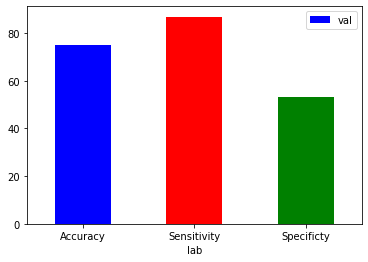

In [15]:
df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[75,86.9,53.1]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])